<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/Comparing_Clusters_Clear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando Clusters

Utilice los siguientes datasets bidimensionales para practicar los diferentes modelos de clustering. En cada uno de ellos grafique para ver los resultados y poder predictivo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture

n_samples = 1500
circulos = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
lunas = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
sin_estructura = np.random.rand(n_samples, 2), None

# Datos anisotrópicos
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
anisot = (X_aniso, y)

# blobs de varianza variable xD
variados = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)



# Los datasets
Utilice las siguientes variables como datasets para su clustering:
* circulos
* lunas
* blobs
* sin_estructura
* anisot
* variedos

Revise las variables en el siguiente cuadro

In [ ]:
lunas

(array([[ 1.74620914, -0.12660097],
        [ 0.80823063,  0.60536529],
        [-0.39151212,  0.91982026],
        ...,
        [ 1.74582243, -0.33689182],
        [-0.03913787,  0.28472366],
        [ 0.29349235,  0.94132438]]), array([1, 0, 0, ..., 1, 1, 0]))

# Recomendación:
Se recomienda escalar las variables para seleccionar mejor los parámetros de cada modelo.

    X = StandardScaler().fit_transform(X)

## Juegue

### Settings

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster
# import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle, islice
# size plot
plt.figure(figsize=(50,20))

<Figure size 3600x1440 with 0 Axes>

<Figure size 3600x1440 with 0 Axes>

Fucctions

In [ ]:
def get_colors(y_pred):
  # geting our color for the plot 
  colors = np.array(list(islice(cycle(['r', 'g', 'b']),int(max(y_pred) + 1))))
  return colors[y_pred]

My Friend "Codo"

In [ ]:
def codo(K,data):
  sum_of_squared_distances = []
  X, y = data
  X = StandardScaler().fit_transform(X)
  for k in range(1,K):
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

  plt.plot(range(1,K),sum_of_squared_distances)
  plt.show()

In [ ]:
def Agg_Cloustering(num_clusters,name):
  # separate the dataset
  X, y = name
  # normalize dataset
  X = StandardScaler().fit_transform(X)
  # call the funtion cluster and create a three clustes 
  list_cluster = (
      cluster.AgglomerativeClustering(affinity='euclidean', n_clusters=num_clusters, linkage='average'),
      cluster.AgglomerativeClustering(affinity='euclidean', n_clusters=num_clusters, linkage='single'),
      cluster.AgglomerativeClustering(affinity='euclidean', n_clusters=num_clusters, linkage='ward')
  )
  plot_num = 1
  # iterate the number of clusters create
  for cluster_ in list_cluster:
    y_pred = cluster_.fit(X).labels_
    plt.subplot(1,len(list_cluster), plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=get_colors(y_pred))
    plt.xticks(())
    plt.yticks(())
    plot_num += 1
  plt.show()

### Circles

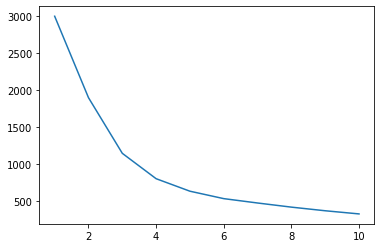

In [ ]:
codo(11,circulos)

cantidad optima de clusters 3

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = circulos
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.39252461010604606

Dado que nuestro valor se encuentra cercano a 0 podemos decir que nuestros clusters se encuentra demaciado cercanos entre ellos o que se encuentran combinados.

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

1209.5857323386927

Como el coeficiente es tan alto podemos decir que los clusters son desnsos y bien definidos

Plot Kmeans labels

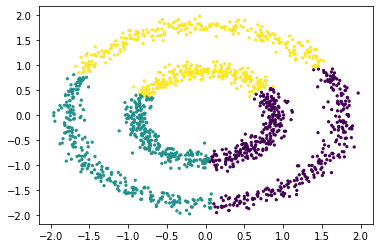

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

Como podemos notar las metricas anteriores nos dieron una idea de como son nuestros clusters, cercanos unos con otros y bien definidos. Pero nos podemos dar cuenta que 3 clusters no son optimos como podemos ver en la imagen

Mini Batch

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

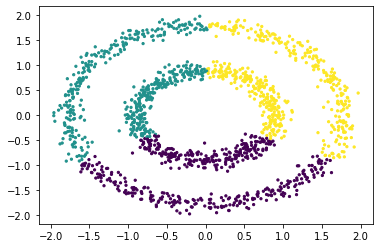

In [ ]:
 from sklearn import mixture
 from scipy.spatial.distance import cdist
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

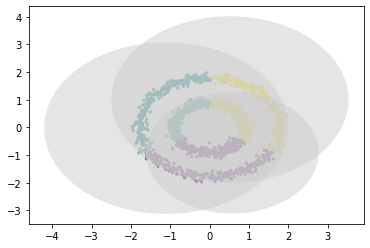

In [ ]:
 # intento de scatter con centros :c
 ax = plt.gca()
 ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
 radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
 for c, r in zip(centers, radii):
   ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

Mean Shift

In [ ]:
 from sklearn.cluster import estimate_bandwidth, MeanShift
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 3


La cantidad de clusters es la misma que encontramos con nuestro amigo el codo

DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Coefficient: 0.11214365862327673


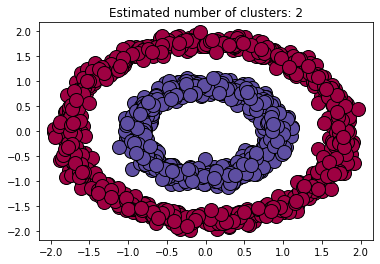

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
print(f'Completeness: {metrics.completeness_score(y, labels)}')
print(f'V-measure: {metrics.v_measure_score(y, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

* Como el dataset se encuentra divido e dos grupos y lo valores se encuentran cercanos en ambos grupos, solo encuentra dos clusters.
* En el dataset no tiene ruido esto quiere decir que no posee outlayers.
* Silhouette Coefficient es diferentes al que sacamos inicialmente :/


Podemos concluir que solo tenemos 2 clusters

Hierarchical Clustering

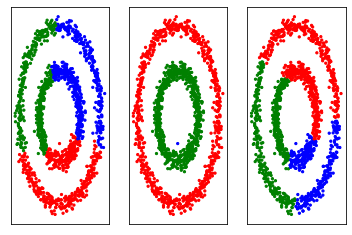

In [ ]:
Agg_Cloustering(num_clusters,circulos)

Average - Single  Ward

### Moon

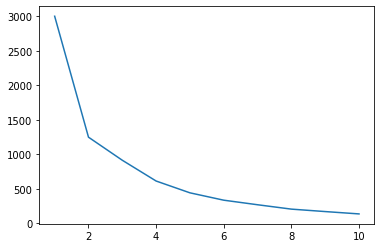

In [ ]:
codo(11,lunas)

cantidad optima de clusters 3

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = lunas
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.4514230451204087

Dado que nuestro valor se encuentra cercano a 0 podemos decir que nuestros clusters se encuentra demaciado cercanos entre ellos o que se encuentran combinados.

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

1712.735047489876

Como el coeficiente es tan alto podemos decir que los clusters son desnsos y bien definidos

Plot Kmeans labels

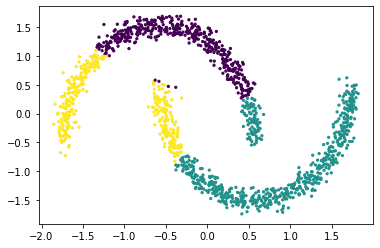

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

Similiar al dataset anterior calculamos una cantidad de 3 clusters, esto nos genero una divicion en nuestro dataset en partes significativas

Mini Batch

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

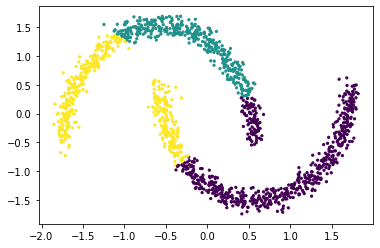

In [ ]:
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

Mean Shift

In [ ]:
 from sklearn.cluster import estimate_bandwidth, MeanShift
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 3


La cantidad de clusters es la misma que encontramos con nuestro amigo el codo

DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Coefficient: 0.39293887324577487


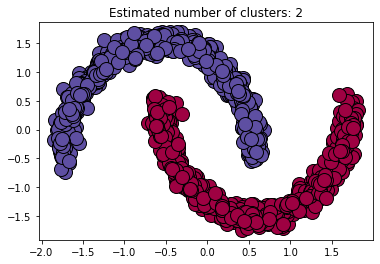

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
print(f'Completeness: {metrics.completeness_score(y, labels)}')
print(f'V-measure: {metrics.v_measure_score(y, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

La cantidad optima de clusters es 2 y lo podemos notar gracias a DBSCAN, acá podemos notar que no tenemos nada de ruido en los dataset y los datos en cada uno de ellos los datos se encuentran casi uno encima del otro

Hierarchical Clustering

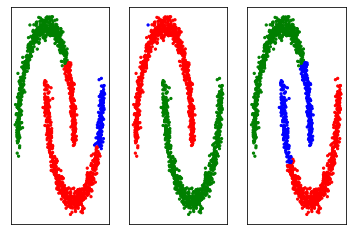

In [ ]:
Agg_Cloustering(num_clusters,lunas)

Average - Single - Ward

### Blobs

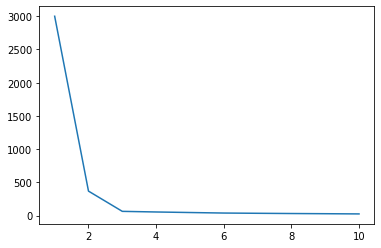

In [ ]:
codo(11,blobs)

no tiene una cantidad optima de dataset, podemos ver que hay una recta con pendiente negariva entre el 2 - 3, para seguir el estudio estimaremos en 2,5 aprox esto es 3 clusters

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = blobs
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.8104321767519068

Dado que nuestro valor se encuentra cercano a 1 podemos decir que nuestros datos son altamente densos

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

34626.60397298819

Como el coeficiente es tan alto podemos decir que los clusters son bien definidos

Plot Kmeans labels

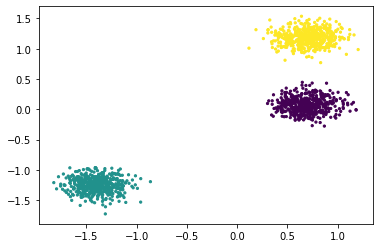

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

3 grupos bien definidos y con una densidad notoria

Mini Batch

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

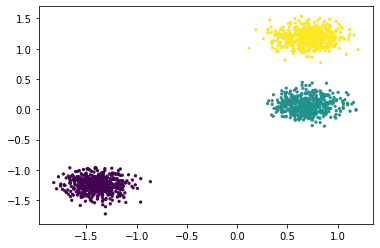

In [ ]:
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

Mean Shift

In [ ]:
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 3


La cantidad de clusters es la misma que encontramos con nuestro amigo el codo

DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Coefficient: 0.8104321767519068


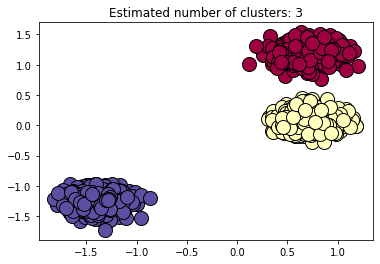

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
print(f'Completeness: {metrics.completeness_score(y, labels)}')
print(f'V-measure: {metrics.v_measure_score(y, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Concuerda con la cantidad de cluster encontrada anteriormente y con las carracteristicas definidas

Hierarchical Clustering

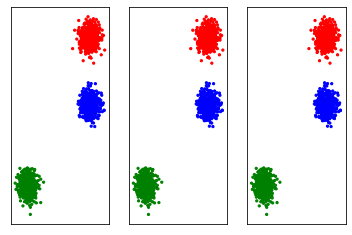

In [ ]:
Agg_Cloustering(num_clusters,blobs)

Average - Single - Ward 


the same

### No_structure

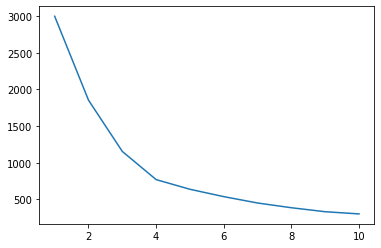

In [ ]:
codo(11,sin_estructura)

cantidad optima de clusters 3 masmomenos

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = sin_estructura
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.38585043810803094

Se encuentran cercano a 0 podemos decir que hay una existencia de solapamiento entre clusters

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

1196.8507819008576

Como el coeficiente es tan alto podemos decir que los clusters bien definidos

Plot Kmeans labels

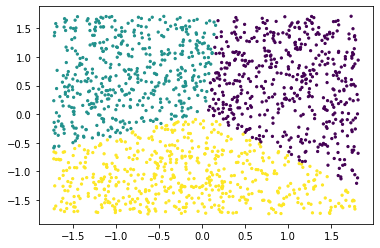

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

Al ver la grafica podemos notar que no son 3 clusters los que se puede dividir el dataset

Mini Batch

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

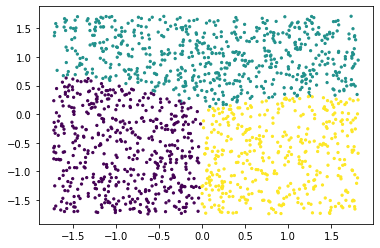

In [ ]:
 from sklearn import mixture
 from scipy.spatial.distance import cdist
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

Mean Shift

In [ ]:
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 2


No concuerda con el metodo del codo, o puede ser que yo me equivoque con la selección del valor

DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 0


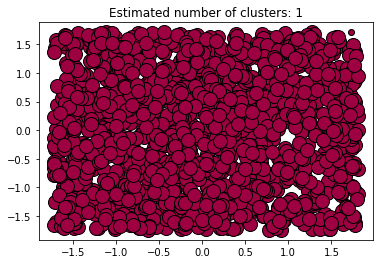

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
#print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
#print(f'Completeness: {metrics.completeness_score(y, labels)}')
#print(f'V-measure: {metrics.v_measure_score(y, labels)}')
#print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
#print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
#print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Como podemos notar solo encuentra 1 cluster por la cercania que tienen los datos entre si, ademas de no posee las carateristicas dado no pueden ser calculadas

Hierarchical Clustering

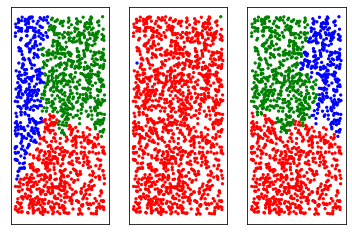

In [ ]:
Agg_Cloustering(num_clusters,sin_estructura)

Average - Single - Ward

### Anisot

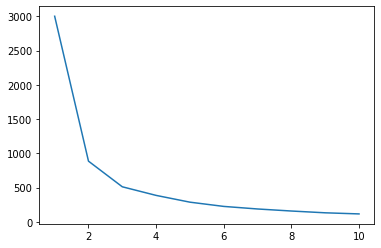

In [ ]:
codo(11,anisot)

similar al ejemplo antes visto, aprox 3

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = anisot
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.5099686776743443

esta equilibrado

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

3637.9129663228578

Como el coeficiente es tan alto podemos decir que los clusters son desnsos y bien definidos

Plot Kmeans labels

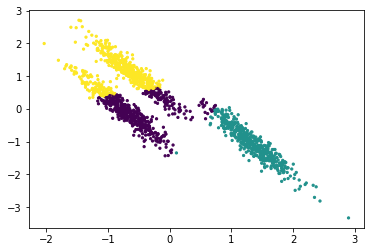

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

Son 3 grupos pero los clusters se encuentran dividos de una forma en que los estan dividiendo

Mini Batch

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

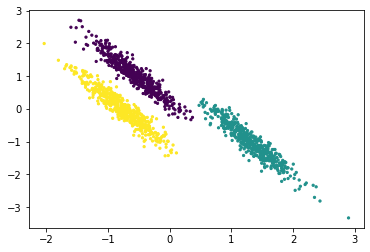

In [ ]:
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

WOWO!! el gmm si toma los grupo como se debe

Mean Shift

In [ ]:
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 2


Encontramos una cantidad diferente a la que encontramos con el codo

DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 11
Homogeneity: 0.0011001771361598249
Completeness: 0.02788026955117237
V-measure: 0.0021168227971848715
Adjusted Rand Index: 9.085662304203643e-06
Adjusted Mutual Information: 0.000849029597994967
Silhouette Coefficient: 0.49424564164939594


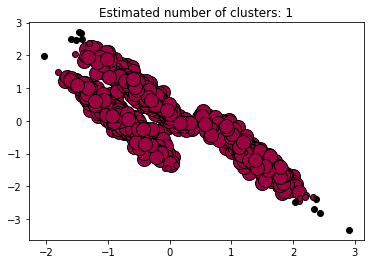

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
print(f'Completeness: {metrics.completeness_score(y, labels)}')
print(f'V-measure: {metrics.v_measure_score(y, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Con DBSCAN solo encuentra 1 solo cluster

Hierarchical Clustering

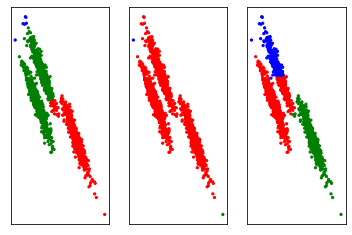

In [ ]:
Agg_Cloustering(num_clusters,anisot)

Average - Single - Ward

### Varied

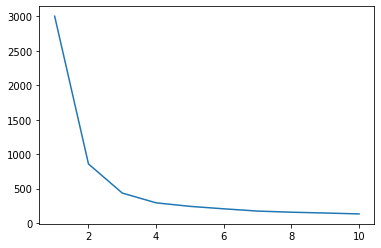

In [ ]:
codo(11,variados)

cantidad optima de clusters 3

In [ ]:
num_clusters = 3

Como son datos no etiquetados usaremos los siguientes modelos

Silhouette Coefficient

In [ ]:
X, y = variados
X = StandardScaler().fit_transform(X)
cluster_ = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = cluster_.labels_
metrics.silhouette_score(X,labels,metric='euclidean')

0.6261628445457234

equilibrado

Calinski-Harabasz

In [ ]:
metrics.calinski_harabasz_score(X, labels)

4409.070650055367

Como el coeficiente es tan alto podemos decir que los clusters son desnsos y bien definidos

Plot Kmeans labels

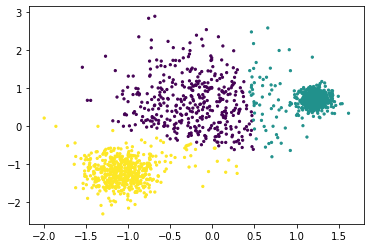

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

eficiente al momento de seleccionar los grupos, podemos notar 3 grupo 2 en los extremos que tiene una varianza menor comparado con el que se encuentra en el centro

Mini Batch

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters,random_state=0,batch_size=6,max_iter=10).fit(X)
centers = kmeans.cluster_centers_

GMM

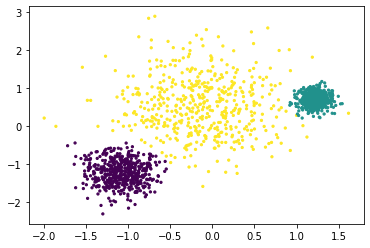

In [ ]:
 gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100).fit(X)
 labels = gmm.predict(X)
 plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

Mean Shift

In [ ]:
 bw = estimate_bandwidth(X, quantile=0.2, n_samples=500)
 ms = MeanShift(bandwidth=bw, bin_seeding=True)
 ms.fit(X)
 labels = ms.labels_
 centers = ms.cluster_centers_

 labels_unique = np.unique(labels)
 num_clusters_ = len(labels_unique)

 print(f'number of estimated clusters : {num_clusters_}')

number of estimated clusters : 3


La cantidad de clusters es la misma que encontramos con nuestro amigo el codo

DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 34
Homogeneity: 0.02036982697512746
Completeness: 0.206742969310368
V-measure: 0.03708569998744045
Adjusted Rand Index: 0.0018613414528724725
Adjusted Mutual Information: 0.03599819682200848
Silhouette Coefficient: 0.2593490895289382


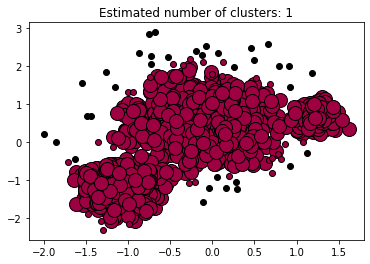

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Homogeneity: {metrics.homogeneity_score(y, labels)}')
print(f'Completeness: {metrics.completeness_score(y, labels)}')
print(f'V-measure: {metrics.v_measure_score(y, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

encontro la existencia de ruido en el dataset y un solo grupo de datos

Hierarchical Clustering

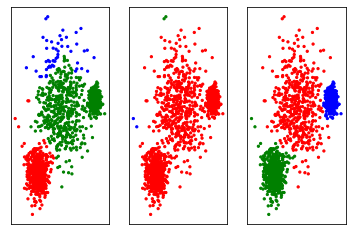

In [ ]:
Agg_Cloustering(num_clusters,variados)

Average - Single - Ward